In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('sba-paycheck-greaterthan-150k')
jovian.set_colab_id('1hHM4_lHc4MpLWlv-f3oiSnCE5h6V6CXa')

     |████████████████████████████████| 71kB 3.5MB/s 


In [2]:
!pip install jovian --upgrade --quiet

In [3]:

%%time
!git clone https://github.com/sbooeshaghi/SBA-PPP-Loan-Data.git

Cloning into 'SBA-PPP-Loan-Data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 228 (delta 20), reused 7 (delta 2), pack-reused 182
Receiving objects: 100% (228/228), 182.94 MiB | 30.17 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Checking out files: 100% (124/124), done.
CPU times: user 94.9 ms, sys: 13.1 ms, total: 108 ms
Wall time: 15.3 s


In [4]:
!unzip /content/SBA-PPP-Loan-Data/over_150k/foia_150k_plus.csv.zip


Archive:  /content/SBA-PPP-Loan-Data/over_150k/foia_150k_plus.csv.zip
  inflating: foia_150k_plus.csv      


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab import data_table
data_table.enable_dataframe_formatter()

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [7]:
# Loading the dataset which has loans greater than $150k

In [12]:
data = pd.read_csv("/content/foia_150k_plus.csv")

In [13]:
data.head(10)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,04/15/2020,First National Bank Alaska,AK - 00
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,04/11/2020,KeyBank National Association,AK - 00
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,06/10/2020,CoBank ACB,AK - 00
5,a $5-10 million,"NANA WORLEY, LLC","3700 Centerpoint Drive, 7th floor",ANCHORAGE,AK,99503.0,541330.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,231.0,05/19/2020,First National Bank Alaska,AK - 00
6,a $5-10 million,"NORTHERN ENERGY SERVICES, LLC",6250 South Airpark Place,ANCHORAGE,AK,99502.0,213112.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,298.0,04/06/2020,Northrim Bank,AK - 00
7,a $5-10 million,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603.0,622110.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,439.0,04/14/2020,First National Bank Alaska,AK - 00
8,a $5-10 million,"TATITLEK TECHNOLOGIES, INC.",561 E. 36th Avenue,ANCHORAGE,AK,99503.0,518210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,361.0,04/14/2020,KeyBank National Association,AK - 00
9,a $5-10 million,"TYONEK GLOBAL SERVICES, LLC",1689 C ST,ANCHORAGE,AK,99501.0,611420.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/30/2020,BBVA USA,AK - 00


In [14]:
data.LoanRange.unique()


array(['a $5-10 million', 'b $2-5 million', 'c $1-2 million',
       'd $350,000-1 million', 'e $150,000-350,000'], dtype=object)

In [31]:
data['LoanRange'].value_counts()

e $150,000-350,000      379054
d $350,000-1 million    199456
c $1-2 million           53030
b $2-5 million           24838
a $5-10 million           4840
Name: LoanRange, dtype: int64

In [34]:
data['BusinessName'].value_counts()

NEW APPLICATION                                      53
FIRST UNITED METHODIST CHURCH                        35
FIRST BAPTIST CHURCH                                 23
THE ROMAN CATHOLIC WELFARE CORPORATION OF OAKLAND    22
TRINITY LUTHERAN CHURCH                              20
                                                     ..
C & E DELIVERY INC                                    1
QILU PUGET SOUND BIOTHERAPEUTICS CORP,                1
D & J LABOR INC                                       1
SOURCECAST INC                                        1
CATALINA CHINA, INC. DBA HF COORS                     1
Name: BusinessName, Length: 656592, dtype: int64

In [36]:
import seaborn as sns

Text(0.5, 1.0, 'Loan Range')

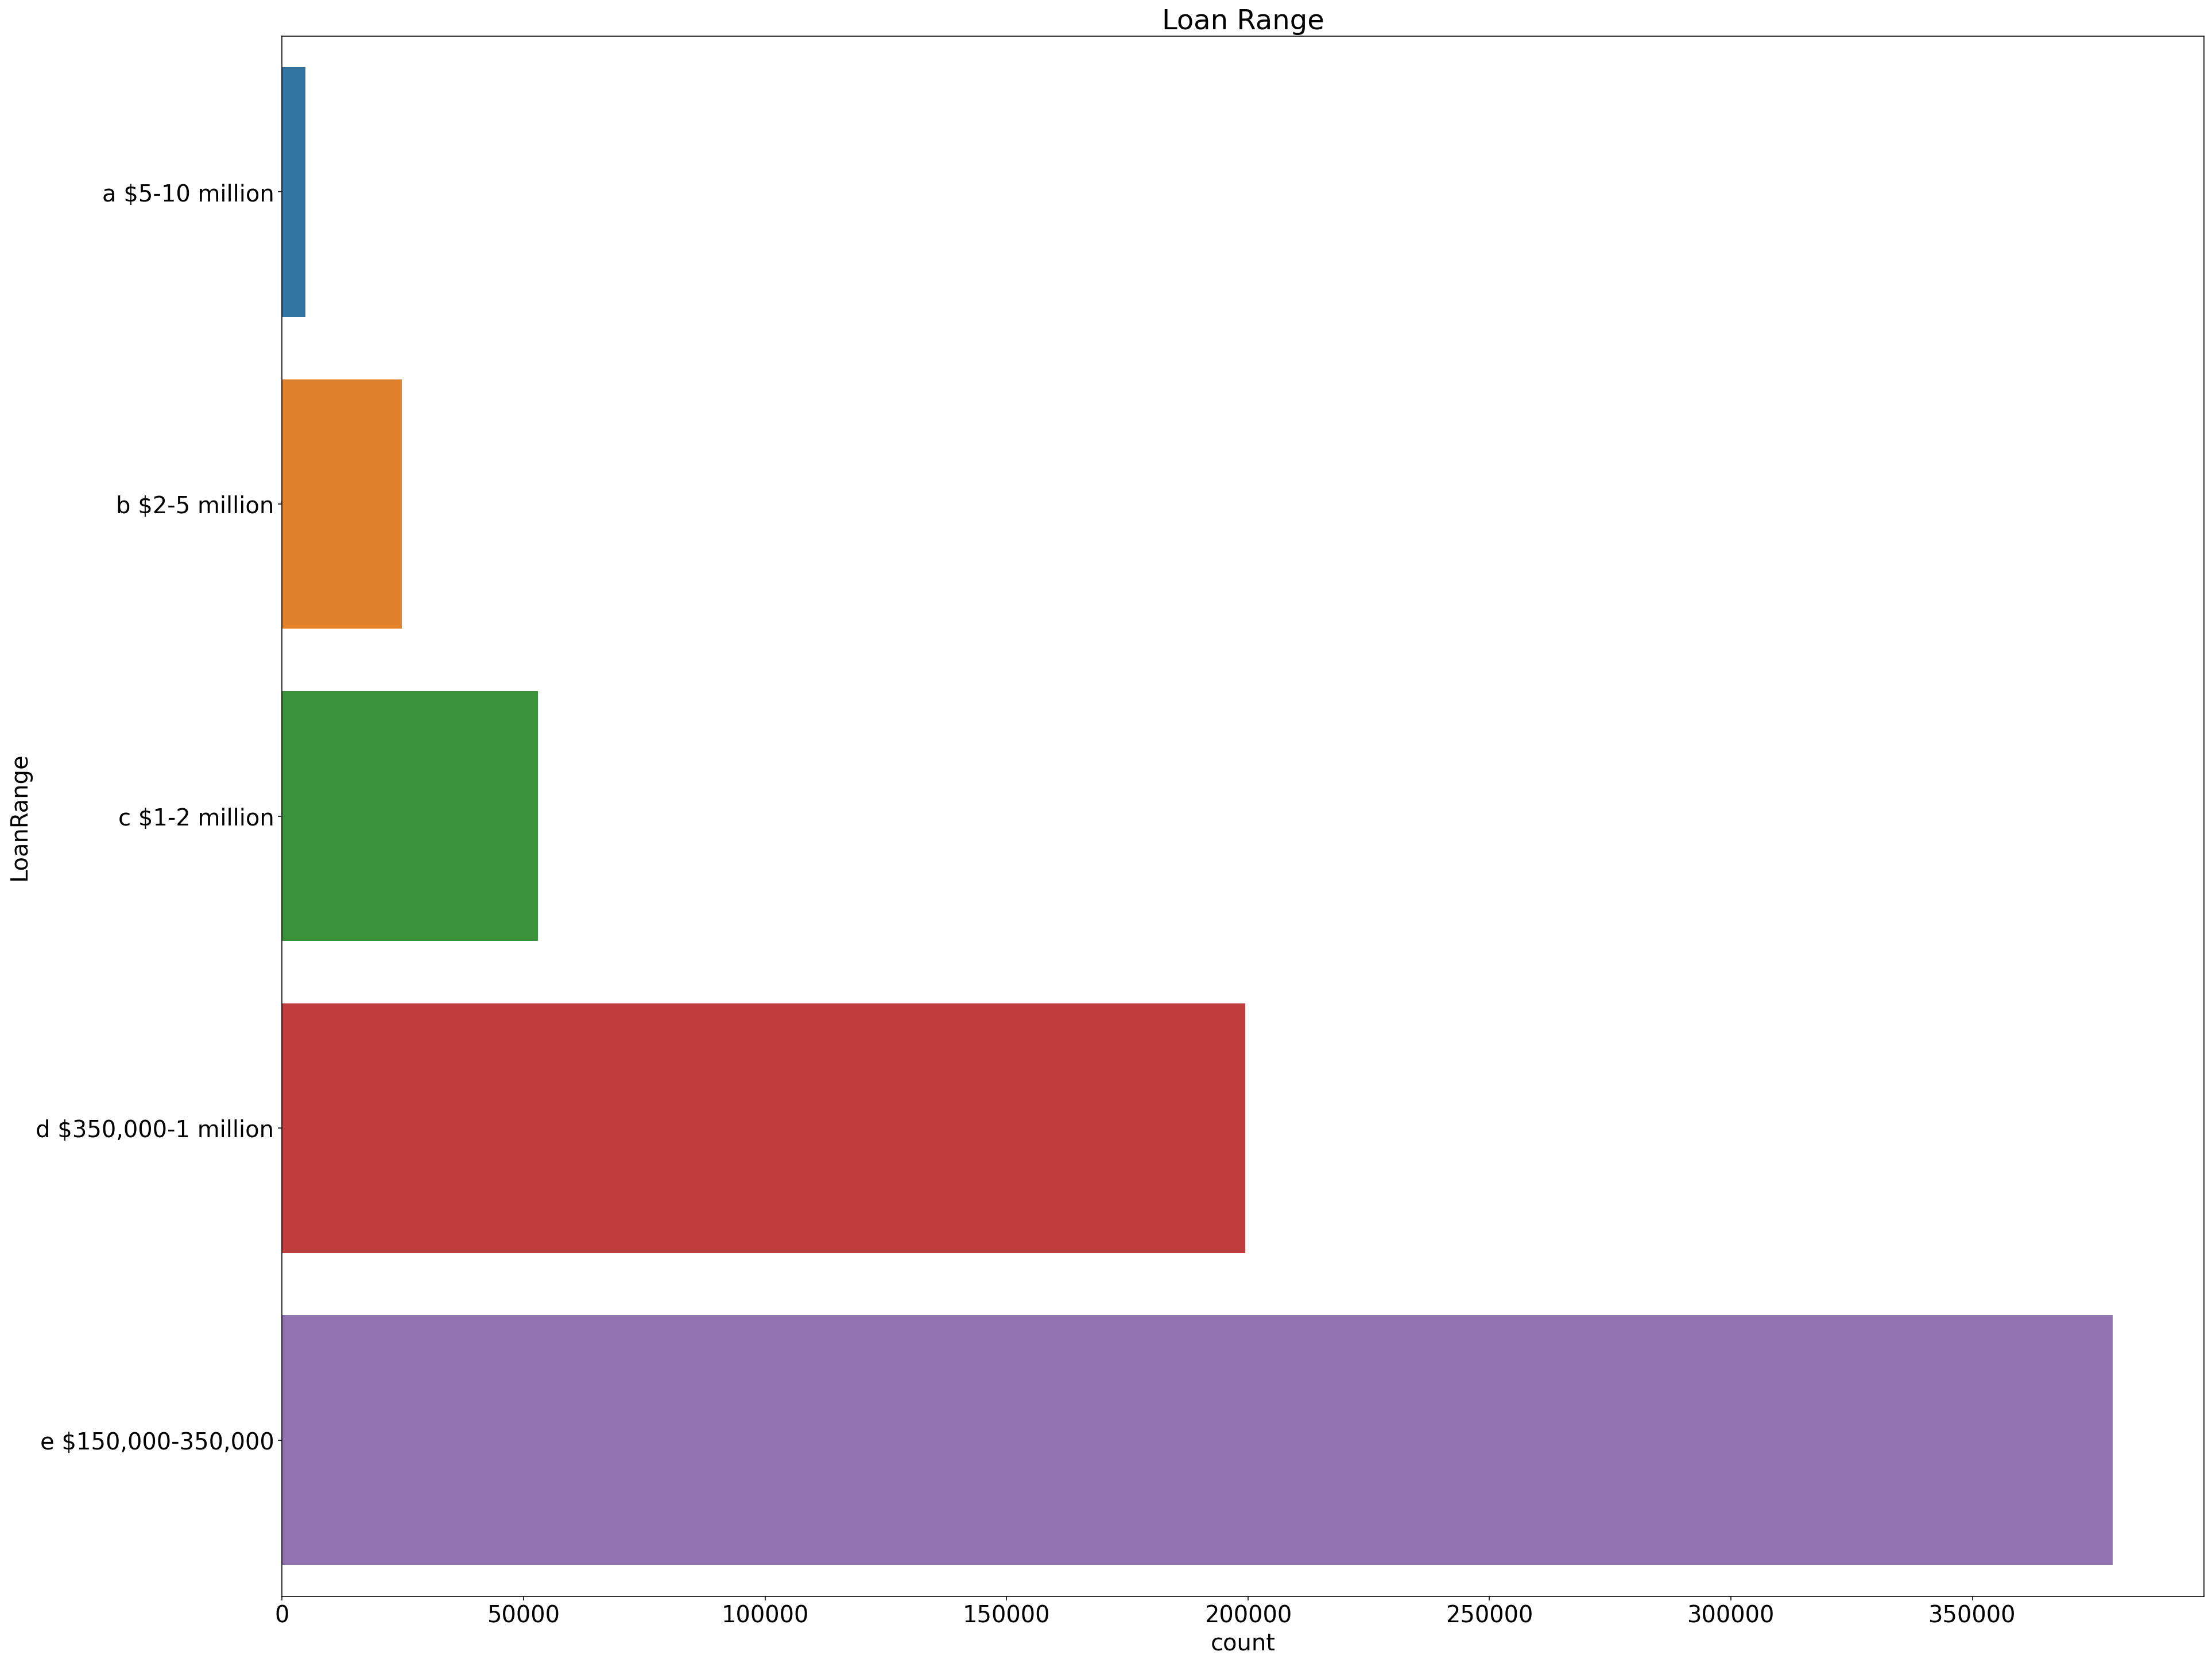

In [37]:
# visualization of race
plt.figure(figsize=(30,25))
sns.countplot(y="LoanRange", data=data)
plt.title("Loan Range")

In [38]:
data['BusinessName'].value_counts()

NEW APPLICATION                                      53
FIRST UNITED METHODIST CHURCH                        35
FIRST BAPTIST CHURCH                                 23
THE ROMAN CATHOLIC WELFARE CORPORATION OF OAKLAND    22
TRINITY LUTHERAN CHURCH                              20
                                                     ..
C & E DELIVERY INC                                    1
QILU PUGET SOUND BIOTHERAPEUTICS CORP,                1
D & J LABOR INC                                       1
SOURCECAST INC                                        1
CATALINA CHINA, INC. DBA HF COORS                     1
Name: BusinessName, Length: 656592, dtype: int64

In [41]:
data['City'].value_counts()

NEW YORK       12851
HOUSTON         8498
CHICAGO         6248
LOS ANGELES     5690
DALLAS          4611
               ...  
SONOITA            1
LOSANTVILLE        1
ATASCOCITA         1
WESTGATE           1
SAN RAFEL          1
Name: City, Length: 15791, dtype: int64

In [43]:
data['State'].value_counts()

CA    87689
TX    52150
NY    46888
FL    42207
IL    27412
PA    26095
OH    22888
NJ    21858
MI    19971
GA    18291
MA    18252
NC    16324
VA    16178
WA    15849
MN    13719
CO    13385
MD    12919
WI    12355
IN    11853
MO    11459
AZ    11326
TN    11269
OR     9224
LA     9060
CT     8595
AL     7872
SC     7615
OK     6848
UT     6737
KY     6438
IA     5936
KS     5858
NV     5542
AR     4256
NE     4179
MS     3890
NH     3441
ID     3313
HI     3228
NM     3002
ME     2840
DC     2806
RI     2453
WV     2300
MT     2196
ND     2178
DE     2073
SD     1944
PR     1941
AK     1652
VT     1542
WY     1363
GU      296
VI      172
MP       56
AS       19
XX       16
Name: State, dtype: int64

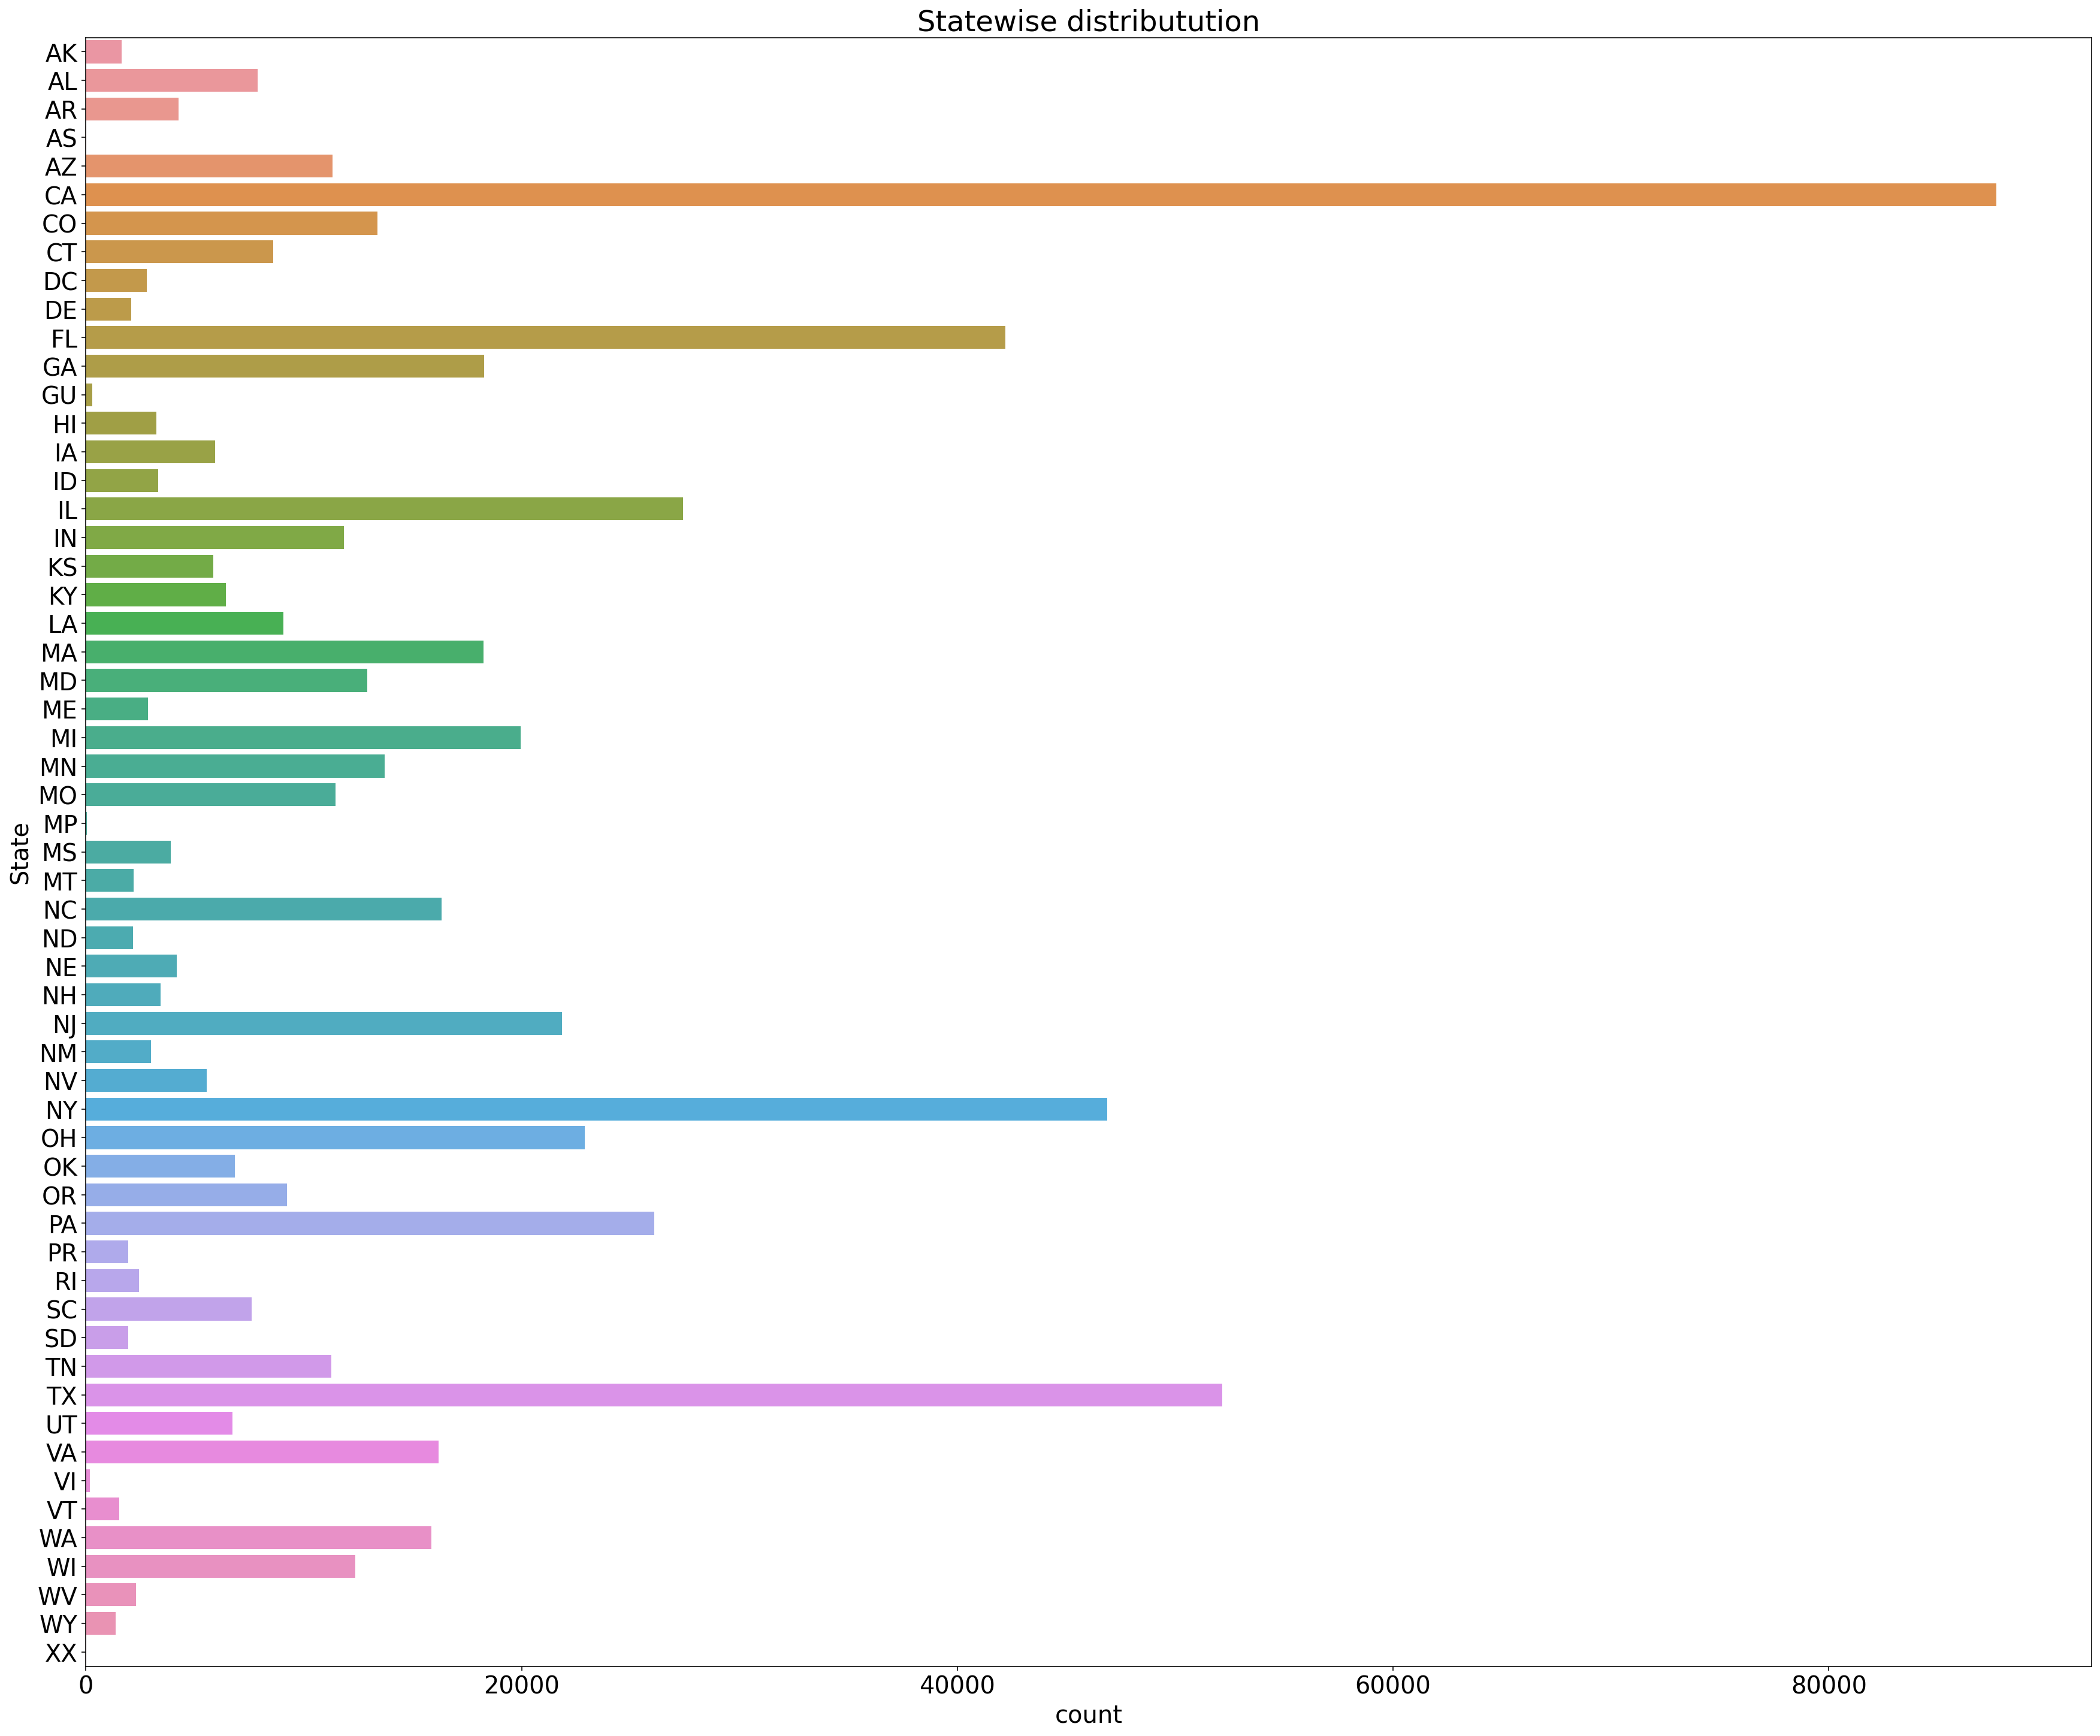

In [44]:
# visualization of race
plt.figure(figsize=(30,25))
sns.countplot(y="State", data=data)
plt.title('Statewise distributution');

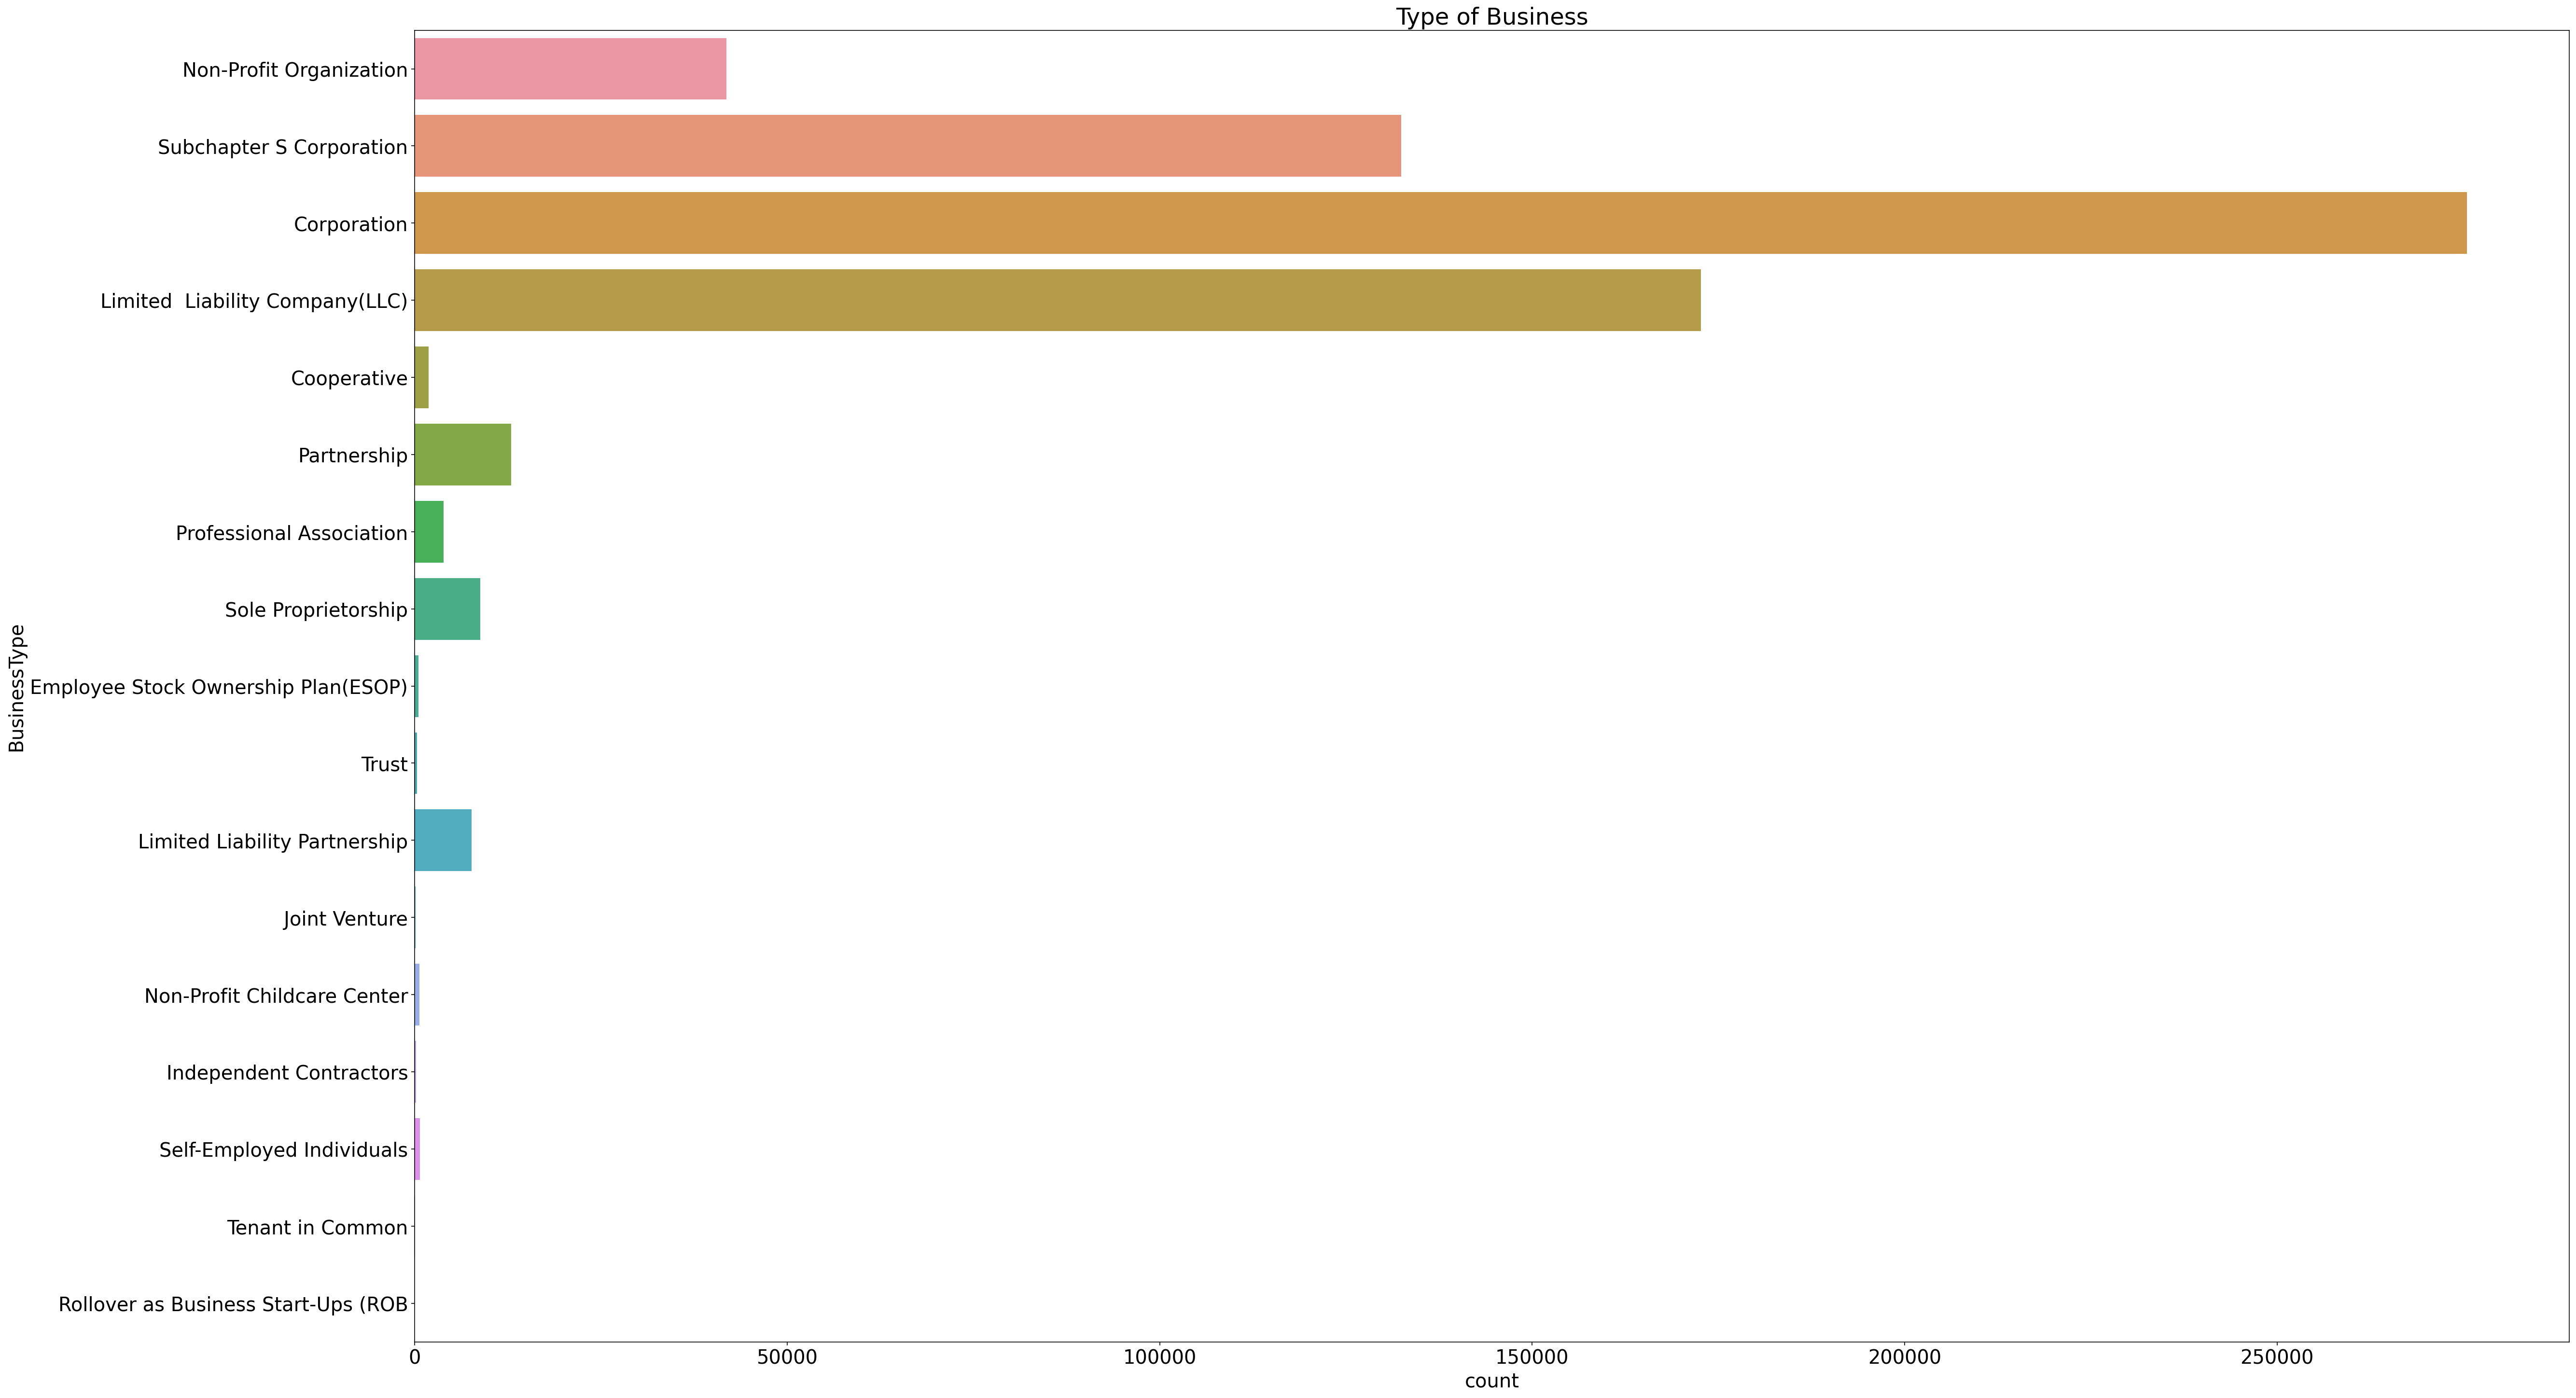

In [46]:
# visualization of race
plt.figure(figsize=(40,25))
sns.countplot(y="BusinessType", data=data)
plt.title('Type of Business');

In [47]:
data['Gender'].value_counts()

Unanswered      470253
Male Owned      159613
Female Owned     31352
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

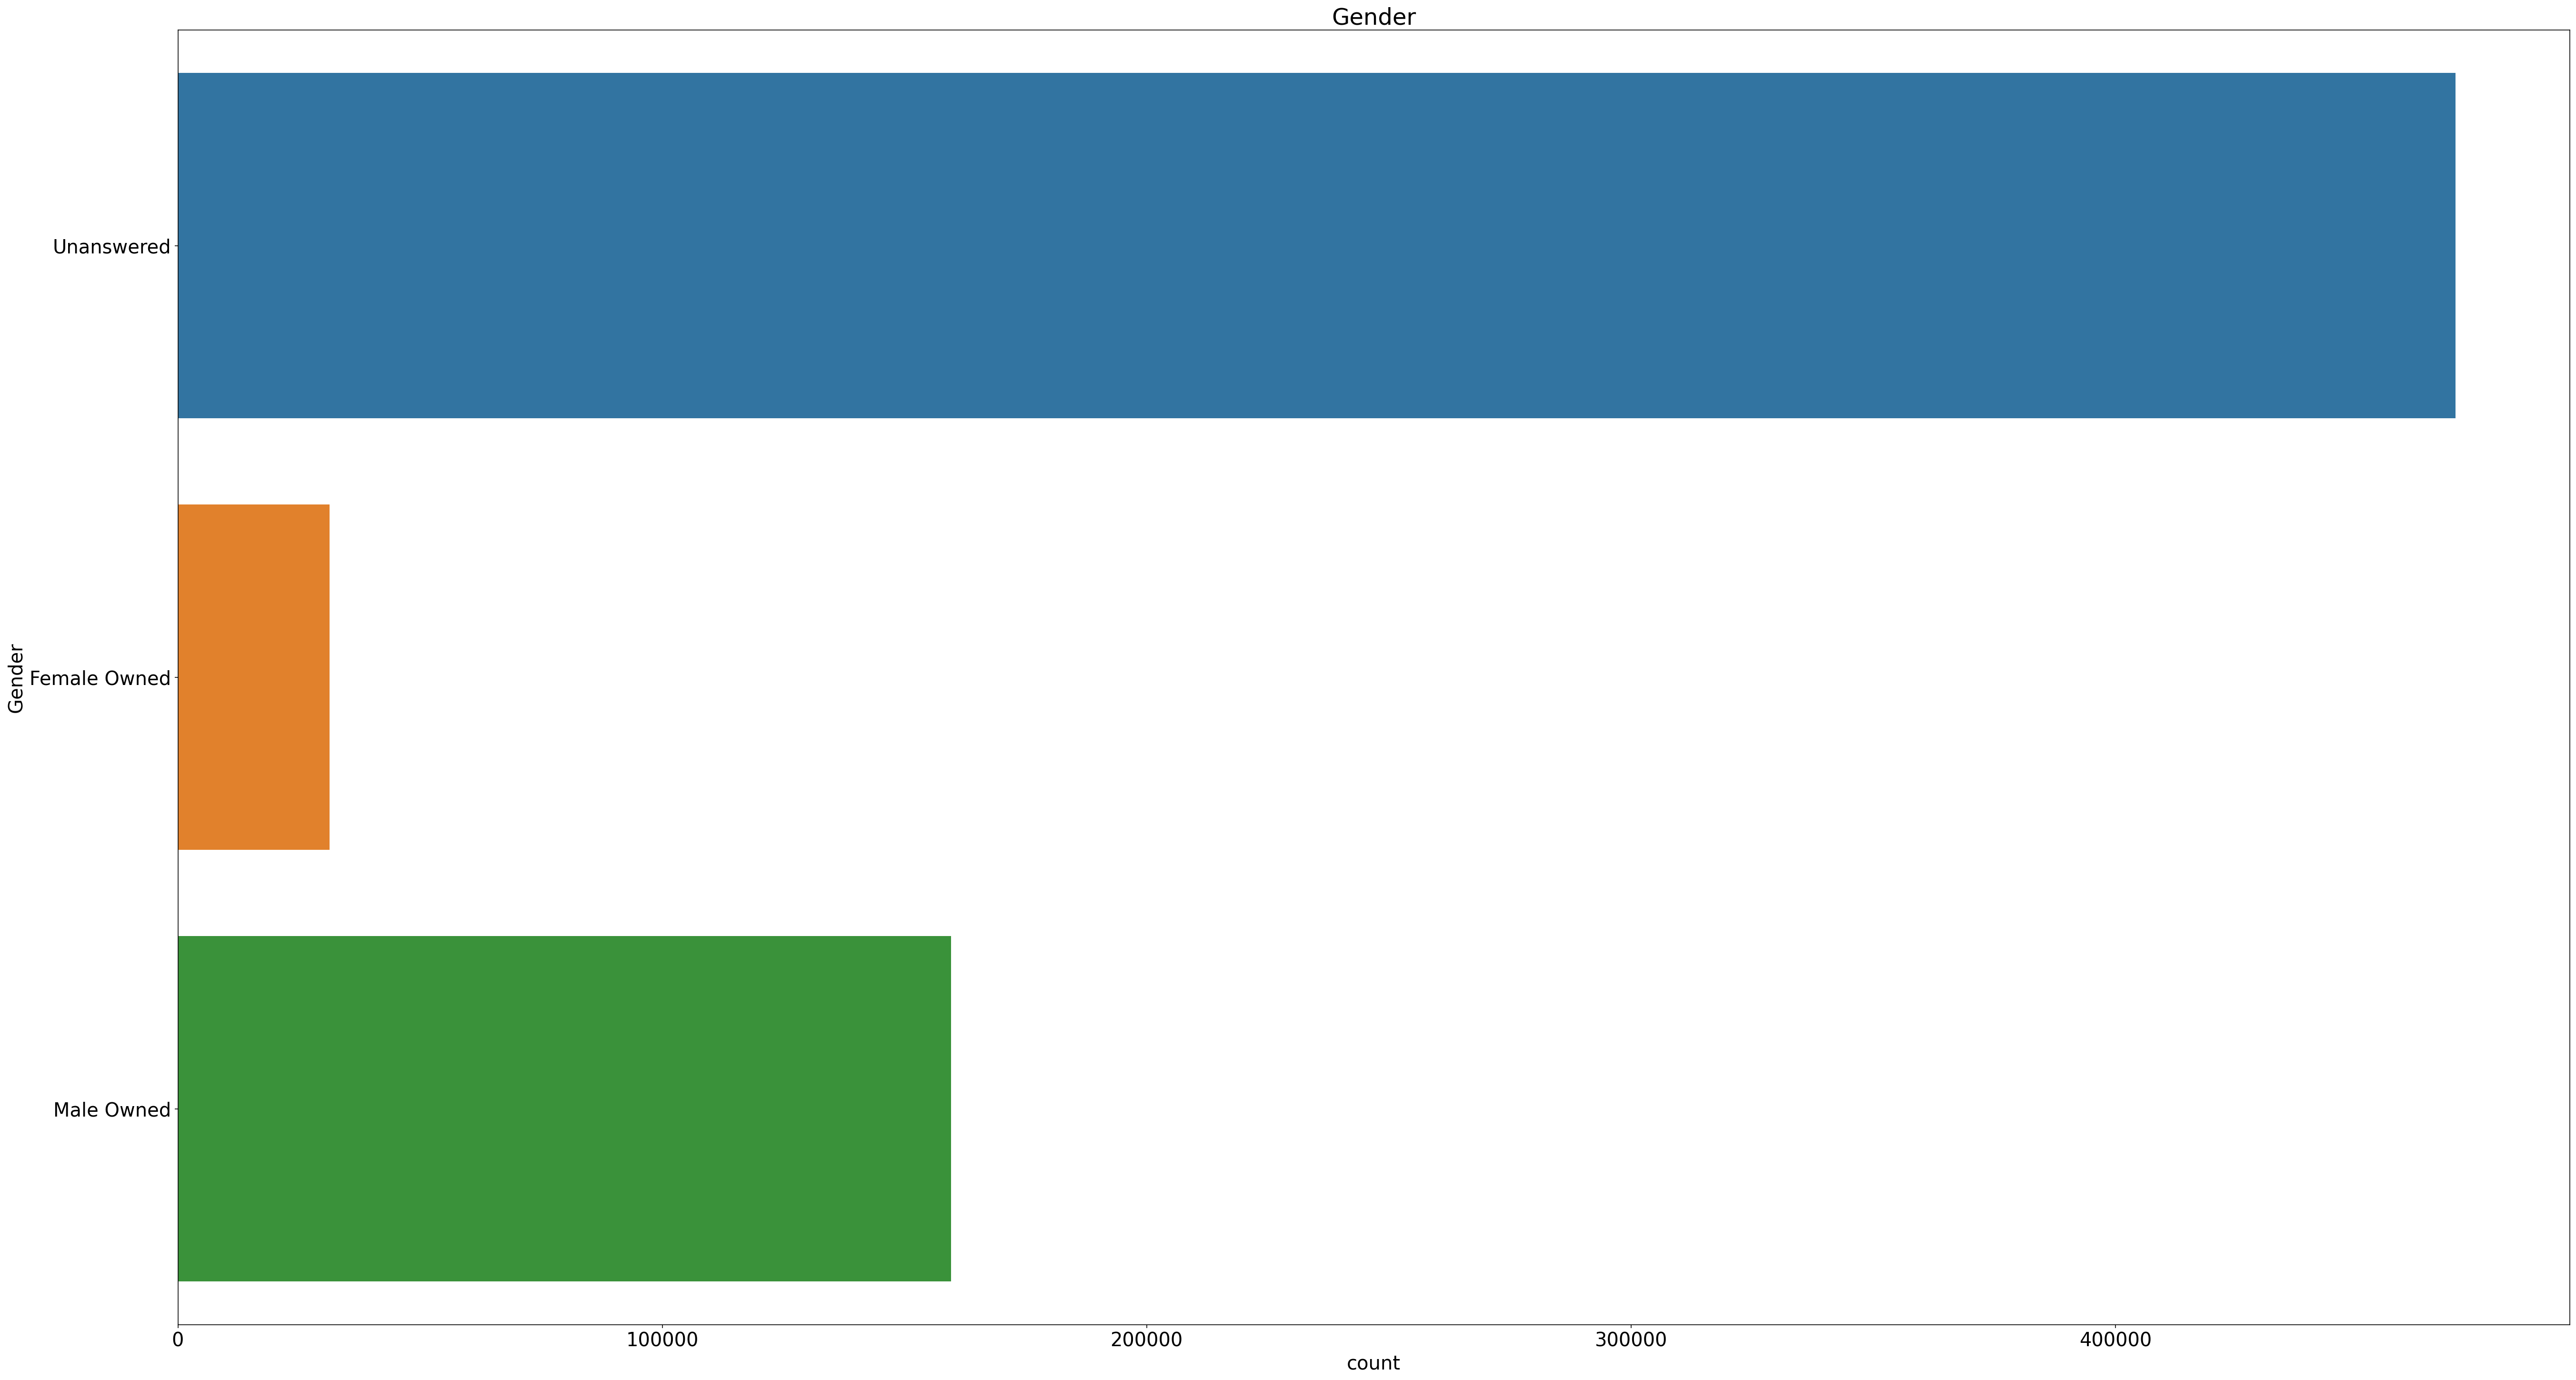

In [50]:
# visualization of race
plt.figure(figsize=(45,25))
sns.countplot(y="Gender", data=data)
plt.title('Gender')

In [51]:
data['Lender'].value_counts()

JPMorgan Chase Bank, National Association      36700
Bank of America, National Association          29157
Truist Bank d/b/a Branch Banking & Trust Co    16076
PNC Bank, National Association                 14649
Wells Fargo Bank, National Association         12147
                                               ...  
Trona Valley Community FCU                         1
Belt Valley Bank                                   1
Eaton Family CU                                    1
The First National Bank of Brownstown              1
Manson State Bank                                  1
Name: Lender, Length: 4322, dtype: int64

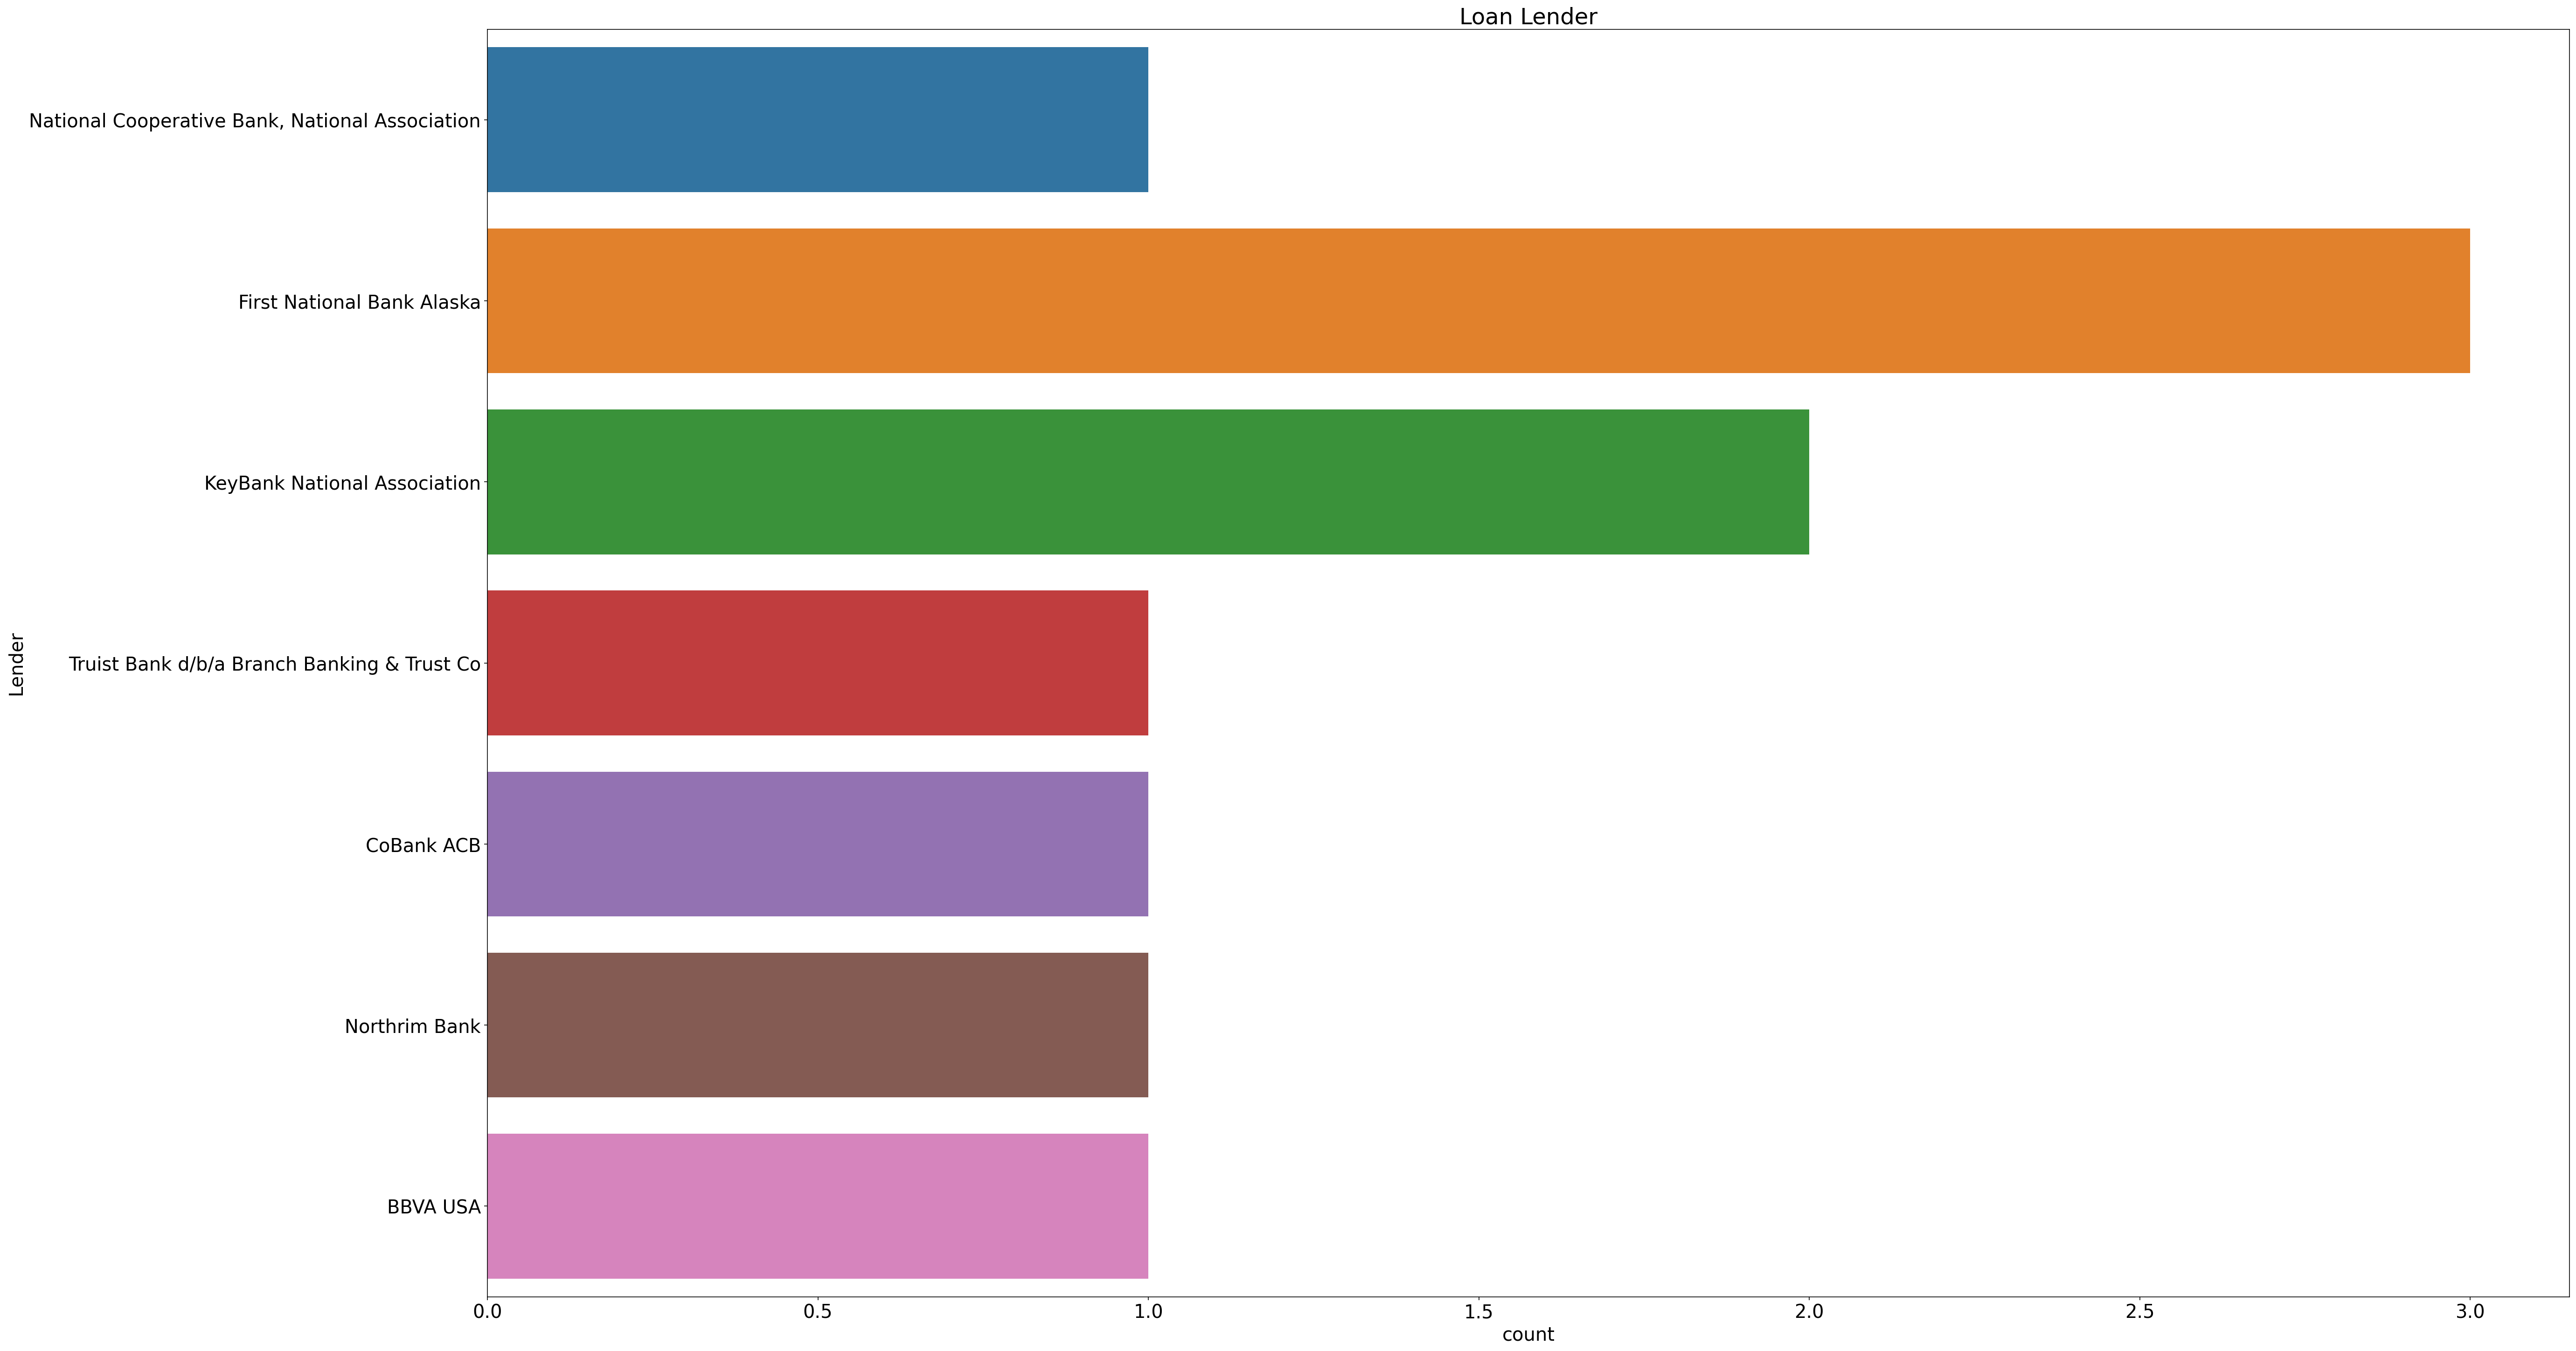

In [54]:
# visualization of race
plt.figure(figsize=(40,25))
sns.countplot(y="Lender", data=data.head(10))
plt.title('Loan Lender');

# Calculating frequency of jobs retained 

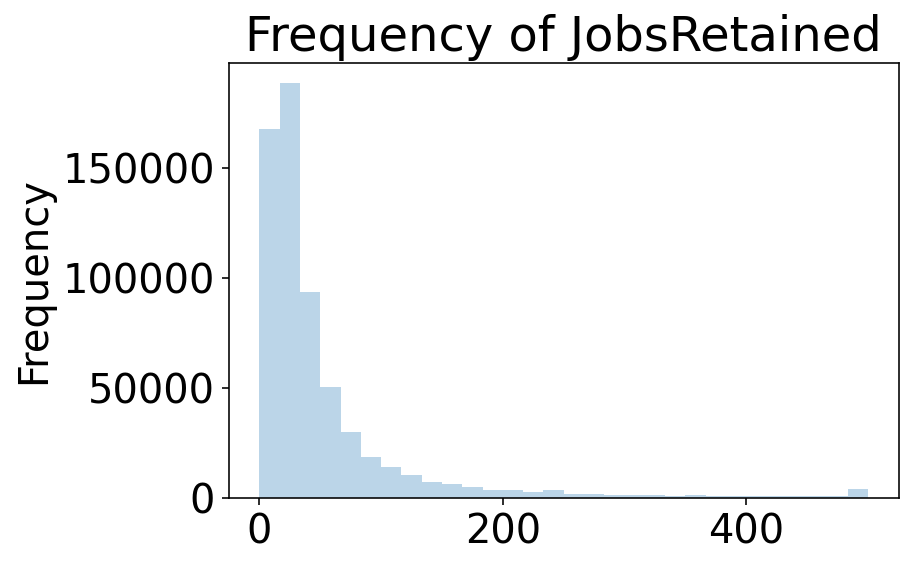

In [53]:
data["JobsRetained"].plot(
    kind="hist", 
    title="Frequency of JobsRetained",
    bins=30,
    alpha=0.3 #adjusts the transperancy
)

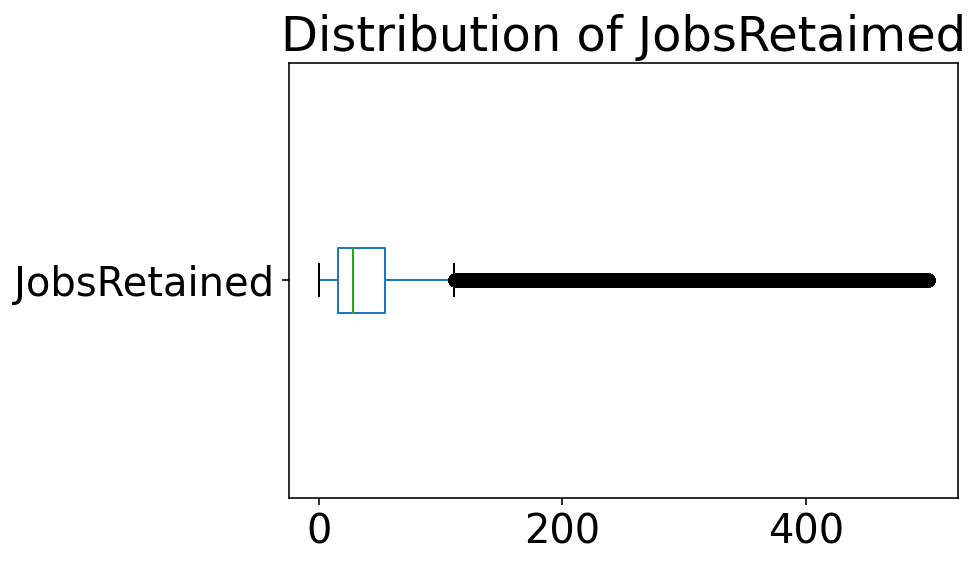

In [22]:
df["JobsRetained"].plot(
    kind="box",
    vert=False, #makes the box plot horizontal
    title="Distribution of JobsRetaimed"
);

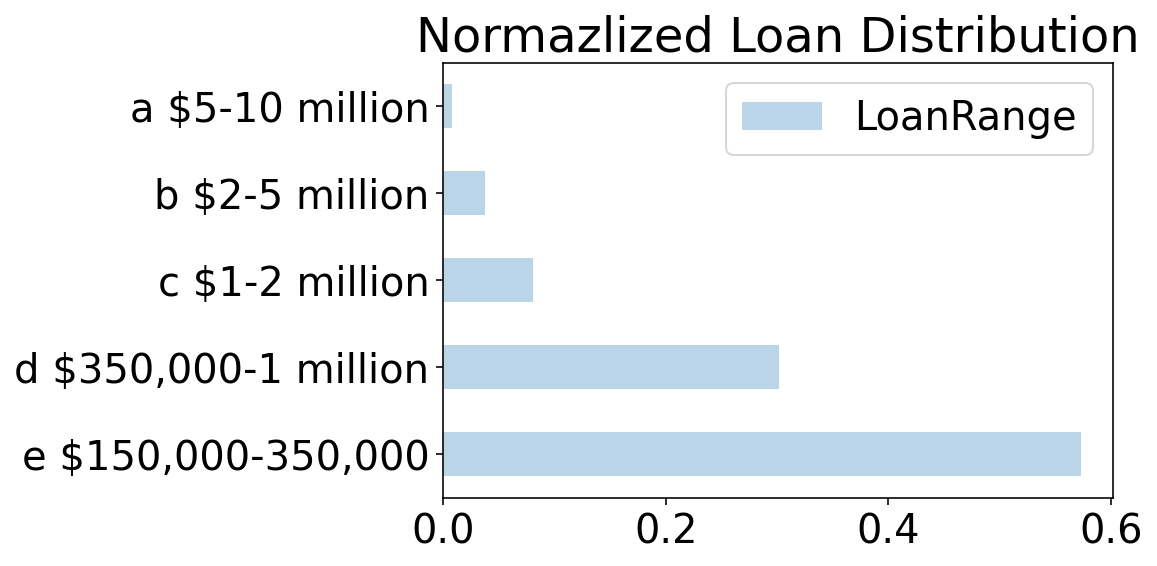

In [24]:
data["LoanRange"].value_counts(normalize=True).plot(
    kind="barh", 
    title="Normazlized Loan Distribution",
    legend=True,
    alpha=0.3
)

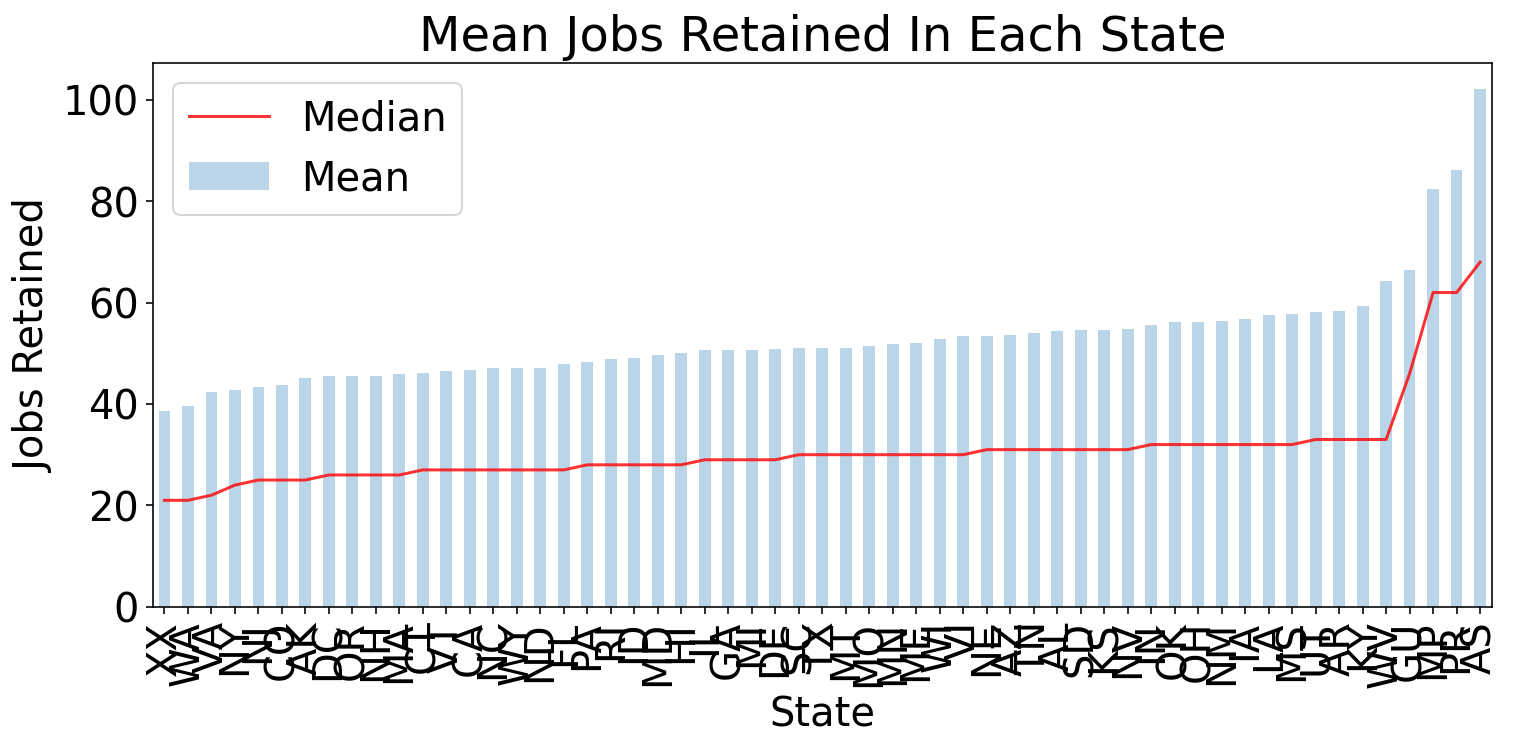

In [25]:
data.groupby("State")["JobsRetained"].mean().sort_values().plot(
    kind="bar",
    title = "Mean Jobs Retained In Each State",
    alpha = 0.3,
    legend=True,
)
data.groupby("State")["JobsRetained"].median().sort_values().plot(
    kind="line",
    title = "Mean Jobs Retained In Each State",
    legend=True,
    color="red",
    rot=90,
    alpha=.8,
    figsize=(12,5) #determines the size 
)
plt.ylabel("Jobs Retained") 
plt.legend(["Median", "Mean"])

In [55]:
jovian.commit('sba-paycheck-greaterthan-150k')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/nc59774/sba-paycheck-greaterthan-150k


'https://jovian.ai/nc59774/sba-paycheck-greaterthan-150k'